**Sobre o conjunto de dados**
Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas.

**Introdução**
Vamos tentar entender a influência dos antecedentes dos pais, preparação para testes etc. no desempenho dos alunos.

[Download dos Dados](https://www.kaggle.com/spscientist/students-performance-in-exams)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

#**IMPORTANDO O DATASET**

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Verificando se há dados nulos:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

**Verificando se há dados duplicados:**

In [14]:
df.duplicated().sum()

0

# **Algumas análises estatísticas básicas**

In [30]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Valores em %**

**A nota mais frequente ou moda foi 65, vamos confirmar nos intervalos interquartílicos mais na frente.**

In [90]:
df["math score"].value_counts(normalize=True)

65    0.036
62    0.035
69    0.032
59    0.032
61    0.027
      ...  
24    0.001
28    0.001
33    0.001
18    0.001
8     0.001
Name: math score, Length: 81, dtype: float64

**Vamos analisar as proporções dos dados em cada Feature:**

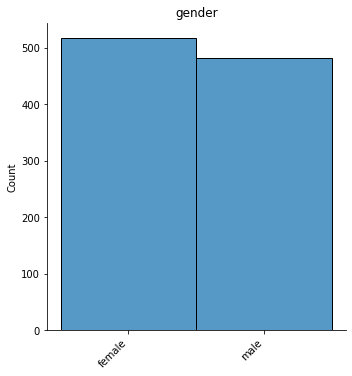

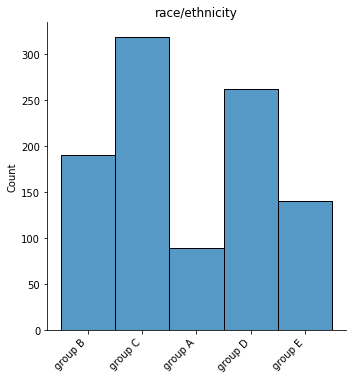

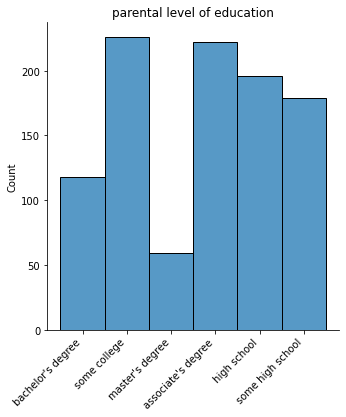

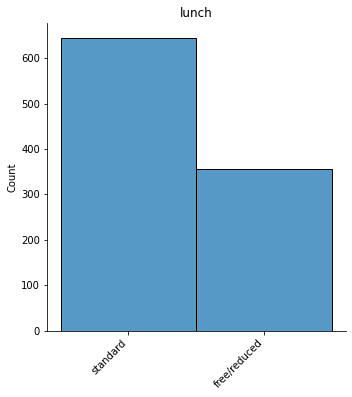

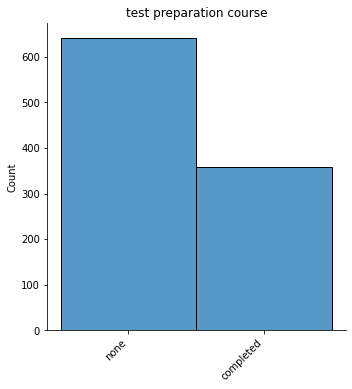

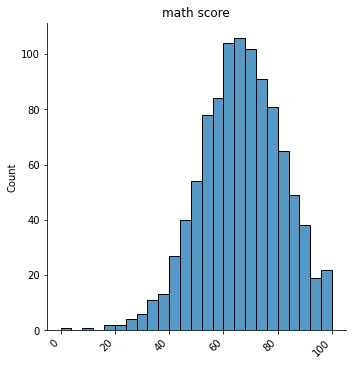

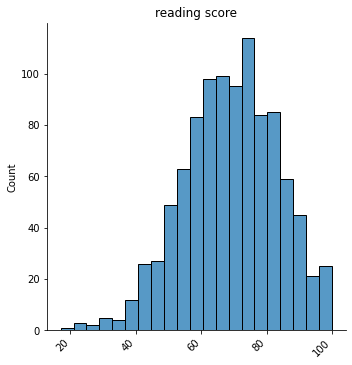

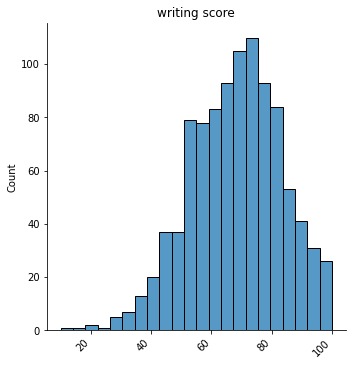

In [73]:
lista_colunas = []
for col in df:
  if col not in lista_colunas:
    lista_colunas.append(col)
for dados in lista_colunas:
  sns.displot(df[dados])
  plt.title(dados)
  plt.xlabel("")
  plt.xticks(rotation=45, ha="right");

### **Correlação:**

**Vemos abaixo nos dois gráficos que há correlações positivas altas e baixas e negativas de acordo com a correlação de Pearson.**

In [26]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


**Correlação de Pearson:**

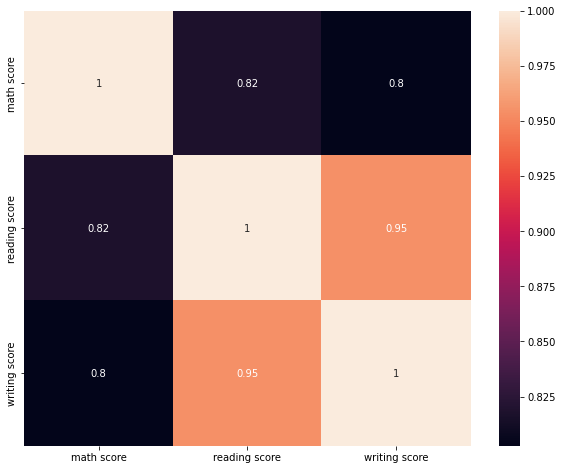

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

**Correlação de Spearman:**

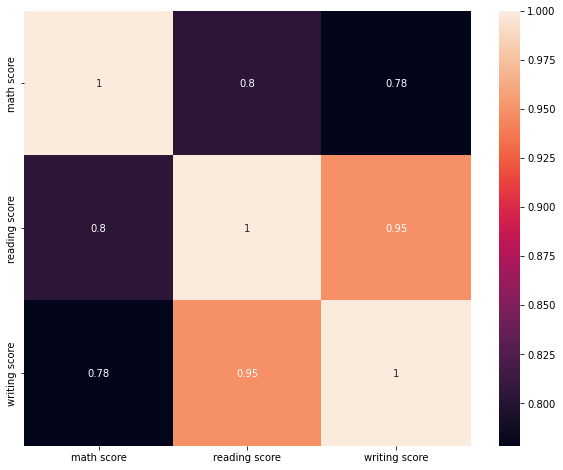

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr("spearman"), annot=True)

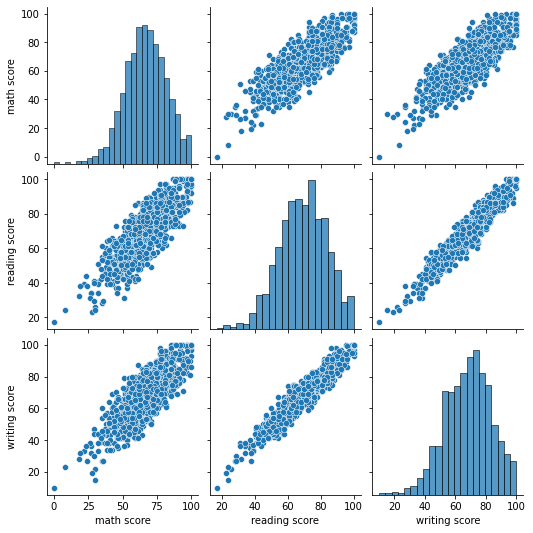

In [31]:
sns.pairplot(df);

###**Intervalo de confiança - Notas de matemática**

**Nível de confiança = 95%**

Iremos pegar 100 amostras aleatórias:

In [74]:
import random
lista = []
for num in df["math score"]:
  lista.append(num)
dados = random.sample(lista,100)

Média amostral:

In [75]:
media = pd.DataFrame(dados).mean()
media = media[0]
media

66.81

Desvio padrão amostral:

In [76]:
desvio_padrao = pd.DataFrame(dados).std()
desvio_padrao  = desvio_padrao[0]
desvio_padrao 

14.793320223409054

Número de amostras:

In [77]:
n = len(dados)
n

100

In [78]:
from scipy.stats import norm
from scipy import stats
import math

In [79]:
stats.sem(dados)

1.4793320223409054

In [80]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(63.910562515035025, 69.70943748496498)

In [81]:
margem_erro = media - intervalos[0]
margem_erro

2.8994374849649773

**Temos 95% de confiança que a média das notas de matemática dos alunos estará entre  63,91 e 69,71  com uma margem de erro de 2,89 para mais e para menos**

**De fato confirmamos abaixo que a média geral está dentro do intervalo:**

In [82]:
df["math score"].mean()

66.089

### **Avaliando os quartis:**

In [85]:
Q1 = df["math score"].quantile(q=0.25) # Primeiro quartil
Q2 = df["math score"].quantile(q=0.50) # Segundo quartil
Q3 = df["math score"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df["math score"].mean()
mediana = df["math score"].median()
moda = df["math score"].value_counts().index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")


Primeiro quartil: 57.0
Segundo quartil: 66.0
Terceiro quartil: 77.0
Intervalo interquartílico: 20.0
Limite superior: 107.0
Limite inferior: 27.0
Média geral: 66.09
Mediana: 66.00
Moda-Valor mais frequente: 65.00


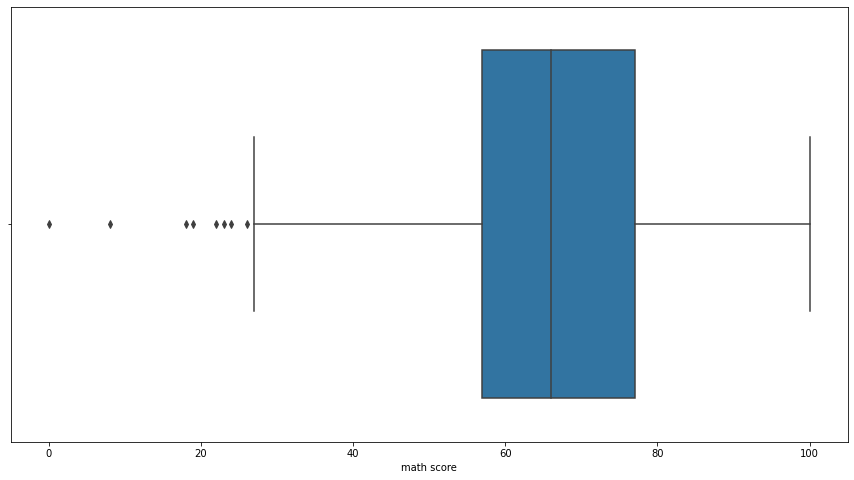

In [86]:
plt.figure(figsize=(15,8))
sns.boxplot(df["math score"]);

### **Assimetria positiva =>  moda <= mediana <= média**

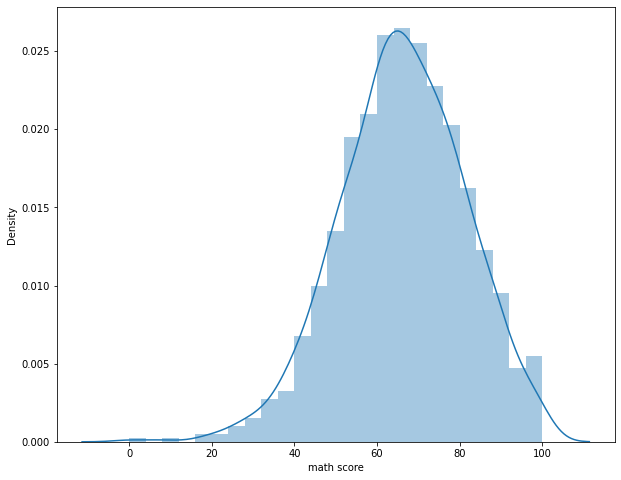

In [88]:
plt.figure(figsize=(10,8))
sns.distplot(df["math score"]);

### **Avaliando a medida de curtose:**

**Para valores abaixo de 0.263 => O resultado identificou como Leptocúrtica, mostrando que a maioria dos seus dados se dá em torno do seu centro:**

In [ ]:
Q10 = df["Price"].quantile(q=0.1) # Décimo quartil
Q90 = df["Price"].quantile(q=0.9) # Nonagésimo quartil
(Q3-Q1)/(2*(Q90-Q10))

0.24630541871921183

#**Vamos analisar as notas das 3 matérias por sexo**

**Resaltando que estou apenas analisando os dados DESTE dataset e não generalisando o mesmo, sem polêmicas, tudo bem?**

**Notamos que no geral a média de matemática é maior com os homens, ocorrendo uma maior variação entre as mulheres. Na prova de leitura e escrita as mulheres tem uma média maior, porém também com uma amplitude mais larga que a dos homens.**

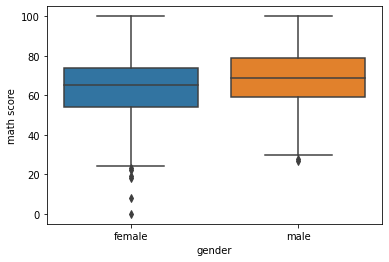

In [92]:
sns.boxplot(data=df, x="gender", y="math score")

**Na tabela abaixo temos em números o desvio padrão maior entre as mulheres e a média maior entre os homens.**

In [95]:
df.groupby(by=["gender"]).describe()["math score"].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


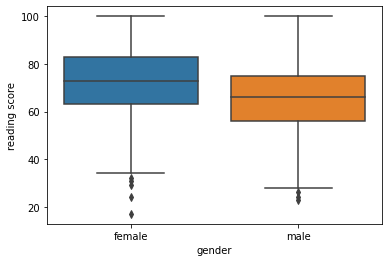

In [93]:
sns.boxplot(data=df, x="gender", y="reading score")

**Na tabela abaixo temos em números o desvio padrão maior entre as mulheres e a média mediana entre os homens.**

In [96]:
df.groupby(by=["gender"]).describe()["reading score"].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
1,male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


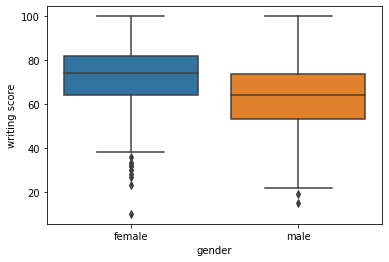

In [98]:
sns.boxplot(data=df, x="gender", y="writing score")

**Na tabela abaixo temos em números o desvio padrão maior entre as mulheres e a média menor entre os homens.**

In [97]:
df.groupby(by=["gender"]).describe()["writing score"].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
1,male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


#**Valeu a pena fazer um curso preparatório para as provas?As notas saíram melhores do que as pessoas que não fizeram?**

**Para facilitar vamos tirar a média das 3 provas e fazer outra coluna:**

In [186]:
df_notas = df[["math score", "reading score", "writing score"]]
df_notas.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [189]:
curso_notas = df[["test preparation course", "math score", "reading score", "writing score"]]
curso_notas.head()

,test preparation course,math score,reading score,writing score
0,none,72,72,74
1,completed,69,90,88
2,none,90,95,93
3,none,47,57,44
4,none,76,78,75


In [203]:
lista_col = []
lista_media = []
for col in df_notas:
    lista_col.append(col)
for num in range(len(df_notas)):
  media = (df_notas[lista_col[0]].iloc[num] + df_notas[lista_col[1]].iloc[num] + df_notas[lista_col[2]].iloc[num])/3
  lista_media.append(media)
curso_notas["media"] = lista_media
df["media"] = lista_media
curso_notas.head()

,test preparation course,math score,reading score,writing score,media
0,none,72,72,74,72.666667
1,completed,69,90,88,82.333333
2,none,90,95,93,92.666667
3,none,47,57,44,49.333333
4,none,76,78,75,76.333333


**No gráfico dá para perceber a diferença, as pessoas que receberam curso preparatório tiraram notas mais altas no geral, inclusive os primeiros 25% (1º quartil) de quem fez curso preparatório tiraram as mesmas notas dos 50% (2º quartil) dos que não fizeram curso preparatório. A variação de quem fez curso preparatório é menor, mostrando notas mais coesas/estáveis.**

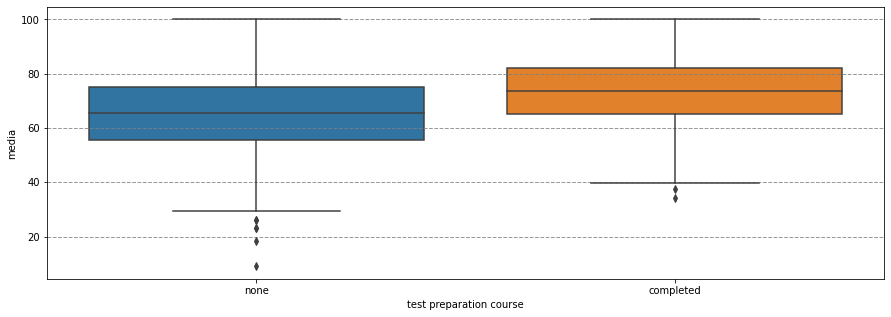

In [200]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="test preparation course", y="media")
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show();

# **A etnia do aluno foi empecilho  para fazer cursos preparatórios e interferiu na média das notas?**

**Nota-se abaixo que houve interferência em todas as etnias e é 
visível como a etnia do aluno intefere no desempenho da sua média. Os alunos da etnia E que deve ser de um nível social mais alto ou de uma cultura que prioriza a educação tiraram, no geral, maiores médias e assim sucessivamente até a etnia A. E > D > C > B > A**

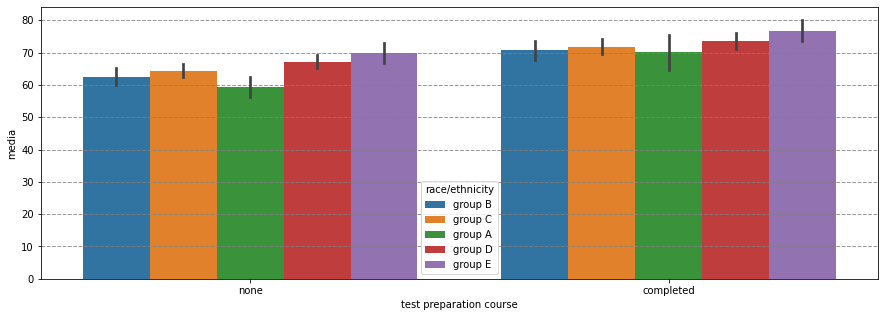

In [205]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x="test preparation course", y="media", hue="race/ethnicity")
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show();

**Vemos abaixo que a diferença foi mais gritante entre as médias da etnia A:**

In [223]:
lista_etnia = []
lista_media_etnia = []
for c in df["race/ethnicity"]:
  if c not in lista_etnia:
    lista_etnia.append(c)
for e in lista_etnia:
  etnia = df[df["race/ethnicity"] == e]
  etnia = etnia[["test preparation course", "media"]]
  etnia_e = etnia[etnia["test preparation course"] == "completed"]["media"].mean()
  etnia_n = etnia[etnia["test preparation course"] == "none"]["media"].mean()
  print(f"Etnia {e}: Com curso: {etnia_e:.2f} | Sem curso {etnia_n:.2f} == Diferença entre as médias: {etnia_e-etnia_n:.2f}")

Etnia group B: Com curso: 70.64 | Sem curso 62.58 == Diferença entre as médias: 8.06
Etnia group C: Com curso: 71.87 | Sem curso 64.39 == Diferença entre as médias: 7.48
Etnia group A: Com curso: 70.06 | Sem curso 59.21 == Diferença entre as médias: 10.85
Etnia group D: Com curso: 73.53 | Sem curso 67.20 == Diferença entre as médias: 6.34
Etnia group E: Com curso: 76.69 | Sem curso 69.80 == Diferença entre as médias: 6.90


#**O nível de educação dos pais varia com a etnia e influencia na média?**

In [226]:
df_level_parents = df[["parental level of education", "race/ethnicity", "media"]]
df_level_parents.head()

,parental level of education,race/ethnicity,media
0,bachelor's degree,group B,72.666667
1,some college,group C,82.333333
2,master's degree,group B,92.666667
3,associate's degree,group A,49.333333
4,some college,group C,76.333333


In [232]:
def grafico_nivel(nivel):
  lista_race = []
  lista_media = []
  for i in sorted(df["race/ethnicity"].unique()):
    if i not in lista_race:
      lista_race.append(i)
      nivel_race = df[df["race/ethnicity"] == i]
      media = nivel_race[nivel_race["parental level of education"] == nivel]["media"].mean()
      lista_media.append(media)

  return lista_media

In [233]:
etnia = sorted(df["race/ethnicity"].unique())

**Os níveis de escolaridade dos pais influenciam as notas dos alunos, independente da etnia, temos algumas variações, mas no geral os alunos dos pais do grupo "E" tem a maior média das notas. Os alunos dos pais que tiveram o menor nível de escolaridade (como algum tipo de nível médio) da etnia "E" tiveram média maior do que os alunos dos pais da etnia "A" que tiveram maior nível alto de escolaridade (Bacharelado e mestrado).**

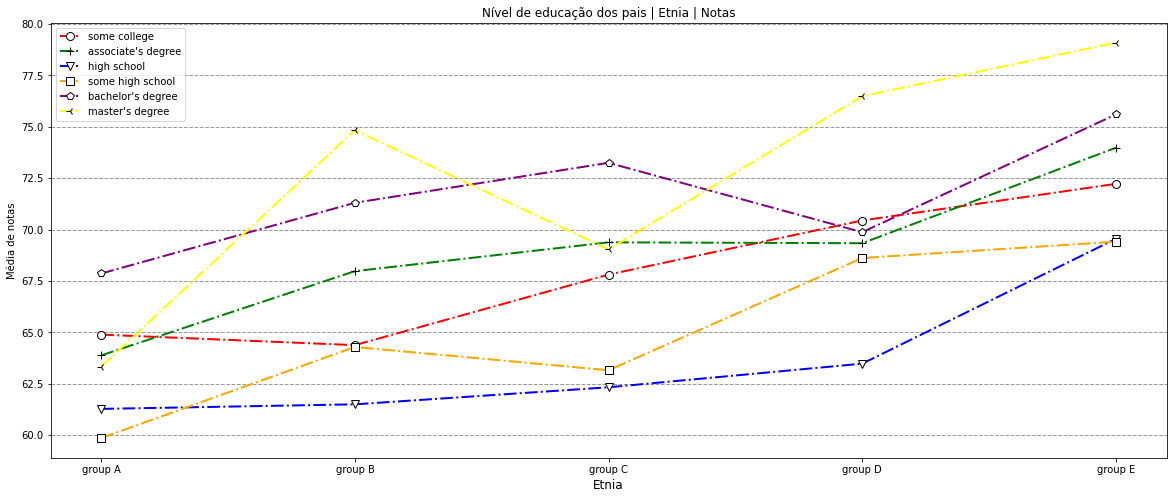

In [235]:
plt.figure(figsize=(20, 8))

plt.plot(etnia, grafico_nivel("some college"), color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2) 
plt.plot(etnia, grafico_nivel("associate's degree"),color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(etnia, grafico_nivel("high school"),color="blue", marker="v", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(etnia, grafico_nivel("some high school"),color="orange", marker="s", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(etnia, grafico_nivel("bachelor's degree"),color="purple", marker="p", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(etnia, grafico_nivel("master's degree"),color="yellow", marker="3", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)


# Rótulos
plt.title("Nível de educação dos pais | Etnia | Notas", loc="center")
plt.xlabel("Etnia", color="black", size=12)
plt.ylabel("Média de notas")
plt.legend(["some college", "associate's degree", "high school", "some high school", "bachelor's degree", "master's degree"])

#Gridlines
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()